<a href="https://colab.research.google.com/github/Shubham-Govardhane/Shubham-Govardhane/blob/main/Mini_Project_1_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump,load
from sklearn import metrics
import warnings


%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [49]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Mini Project 1/Telco_Customer_Churn.xlsx")

In [50]:
df.shape

(6000, 21)

## EDA 

In [51]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
1,5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
2,3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
3,7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
4,9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.6500,Yes


In [52]:
df.set_index('customerID',inplace=True)

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.6500,Yes


In [54]:
df.shape

(6000, 20)

In [55]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

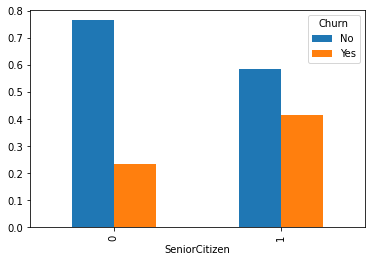

In [56]:
pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index').plot(kind='bar')

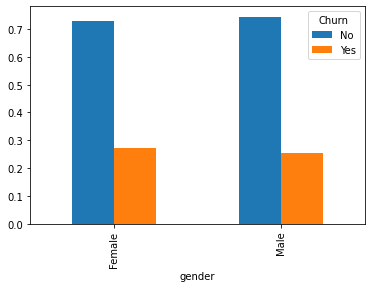

In [57]:
pd.crosstab(df['gender'],df['Churn'],normalize='index').plot(kind='bar')

In [58]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No    2514.3543
Yes   1504.0237
Name: TotalCharges, dtype: float64

## Checking Data types

In [59]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Converting SeniorCitizen to Object as it is nominal variable

In [60]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [61]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Missing Values Check

In [62]:
df.isna().mean()*100

gender              5.0000
SeniorCitizen       0.0000
Partner             0.0000
Dependents          0.0000
tenure              8.1333
PhoneService        0.0000
MultipleLines       0.0000
InternetService     0.0000
OnlineSecurity      0.0000
OnlineBackup        0.0000
DeviceProtection    0.0000
TechSupport         0.0000
StreamingTV         0.0000
StreamingMovies     0.0000
Contract            0.0000
PaperlessBilling    0.0000
PaymentMethod       0.0000
MonthlyCharges      9.5833
TotalCharges       12.5500
Churn               0.0000
dtype: float64

## Missing Values imputation

### Gender

In [63]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

## Tenure

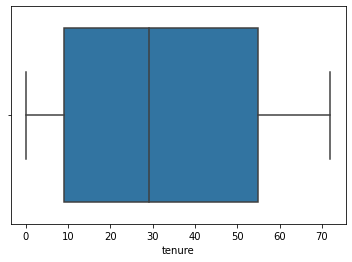

In [64]:
sns.boxplot(df['tenure'])

In [65]:
df['tenure'].fillna(df['tenure'].median(),inplace=True)

### MonthlyCharges

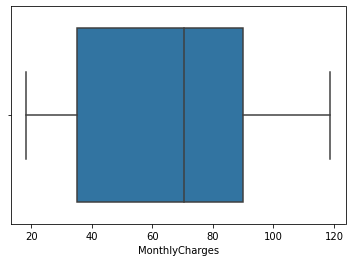

In [66]:
sns.boxplot(df['MonthlyCharges'])

In [67]:
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(),inplace=True)

### TotalCharges

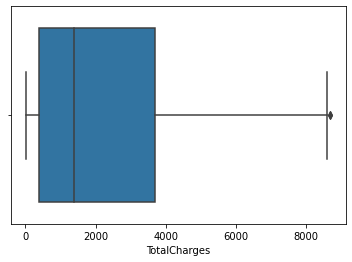

In [68]:
sns.boxplot(df['TotalCharges'])

In [69]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [70]:
df.isna().mean()*100

gender             0.0000
SeniorCitizen      0.0000
Partner            0.0000
Dependents         0.0000
tenure             0.0000
PhoneService       0.0000
MultipleLines      0.0000
InternetService    0.0000
OnlineSecurity     0.0000
OnlineBackup       0.0000
DeviceProtection   0.0000
TechSupport        0.0000
StreamingTV        0.0000
StreamingMovies    0.0000
Contract           0.0000
PaperlessBilling   0.0000
PaymentMethod      0.0000
MonthlyCharges     0.0000
TotalCharges       0.0000
Churn              0.0000
dtype: float64

In [71]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.3000,151.6500,Yes


## Columns categorization

In [72]:
nominal_cols = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
               'StreamingMovies','PaperlessBilling', 'PaymentMethod']

ordinal_cols = ['Contract']

numeric_cols = ['tenure','MonthlyCharges', 'TotalCharges']

target  = ['Churn']

## Imbalance Check

In [73]:
df['Churn'].value_counts()/len(df)*100

No    73.5667
Yes   26.4333
Name: Churn, dtype: float64

## Outlier Analysis

In [74]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
model_ee.fit(df[numeric_cols])
dump(model_ee,"/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_outliers.joblib")
df['anomaly_score'] = model_ee.predict(df[numeric_cols])
ee_index = list(df[df['anomaly_score']==-1].index)

In [75]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,anomaly_score
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No,1
5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No,1
3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes,1
7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No,1
9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.3000,151.6500,Yes,1


In [76]:
len(ee_index)

300

In [77]:
df.drop(ee_index,inplace=True)

In [78]:
df.shape

(5700, 21)

In [79]:
del df['anomaly_score']

In [80]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,No
5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,No
3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes
7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,No
9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.3000,151.6500,Yes


## Treating categorical variable

## Target Variable

In [81]:
df['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [82]:
df['Churn'].value_counts()

0    4135
1    1565
Name: Churn, dtype: int64

## Numeric Columns

## Standardization

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df[numeric_cols])

StandardScaler()

In [84]:
dump(sc,"/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_Standardsc.joblib")

['/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_Standardsc.joblib']

In [85]:
sc_mp = load("/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_Standardsc.joblib")

In [86]:
sc_df = pd.DataFrame(sc_mp.transform(df[numeric_cols]),columns=numeric_cols,index=df.index)
sc_df

,tenure,MonthlyCharges,TotalCharges
customerID,,,
7590-VHVEG,-1.2883,-1.2009,-0.9949
5575-GNVDE,0.1558,-0.2452,-0.0756
3668-QPYBK,-1.2445,-0.3545,-0.9562
7795-CFOCW,0.6372,-0.7618,-0.0997
9237-HQITU,-1.2445,0.2256,-0.9347
...,...,...,...
9661-ACXBS,0.5059,1.4564,1.1659
5656-JAMLX,1.3811,-1.5535,-0.3899
3462-BJQQA,-1.0695,0.9116,-0.7365


In [87]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1.0000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.8500,0
5575-GNVDE,Male,0,No,No,34.0000,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5000,0
3668-QPYBK,Male,0,No,No,2.0000,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,1
7795-CFOCW,Male,0,No,No,45.0000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.7500,0
9237-HQITU,Female,0,No,No,2.0000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.3000,151.6500,1


In [88]:
df.drop(columns=numeric_cols,inplace=True)

In [89]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
customerID,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [90]:
df = pd.concat([df,sc_df],axis=1)

In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,-1.2883,-1.2009,-0.9949
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,0.1558,-0.2452,-0.0756
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,-1.2445,-0.3545,-0.9562
7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,0.6372,-0.7618,-0.0997
9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,-1.2445,0.2256,-0.9347


## Ordinal Variables

In [92]:
df['Contract'].value_counts()

Month-to-month    3296
Two year          1221
One year          1183
Name: Contract, dtype: int64

In [93]:
df['Contract'].replace({'Month-to-month':1,'One year':2,'Two year':3},inplace=True)

In [94]:
input_cols = nominal_cols+ordinal_cols+numeric_cols

## Nominal Variables

In [95]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False,handle_unknown='ignore',dtype=int,drop='first')
oh.fit(df[nominal_cols])
dump(oh,"/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_OneHot.joblib")
oh_df = pd.DataFrame(oh.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)
oh_df

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661-ACXBS,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0
5656-JAMLX,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
3462-BJQQA,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0


In [96]:
df.drop(columns=nominal_cols,inplace=True)
df = pd.concat([df,oh_df],axis=1)
df

,Contract,Churn,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,-1.2883,-1.2009,-0.9949,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
5575-GNVDE,2,0,0.1558,-0.2452,-0.0756,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3668-QPYBK,1,1,-1.2445,-0.3545,-0.9562,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
7795-CFOCW,2,0,0.6372,-0.7618,-0.0997,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
9237-HQITU,1,1,-1.2445,0.2256,-0.9347,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661-ACXBS,1,1,0.5059,1.4564,1.1659,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0
5656-JAMLX,3,0,1.3811,-1.5535,-0.3899,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
3462-BJQQA,1,0,-1.0695,0.9116,-0.7365,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0


In [97]:
df.shape

(5700, 30)

In [98]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [99]:
X.dtypes

Contract                                   int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                int64
SeniorCitizen_1                            int64
Partner_Yes                                int64
Dependents_Yes                             int64
PhoneService_Yes                           int64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes     

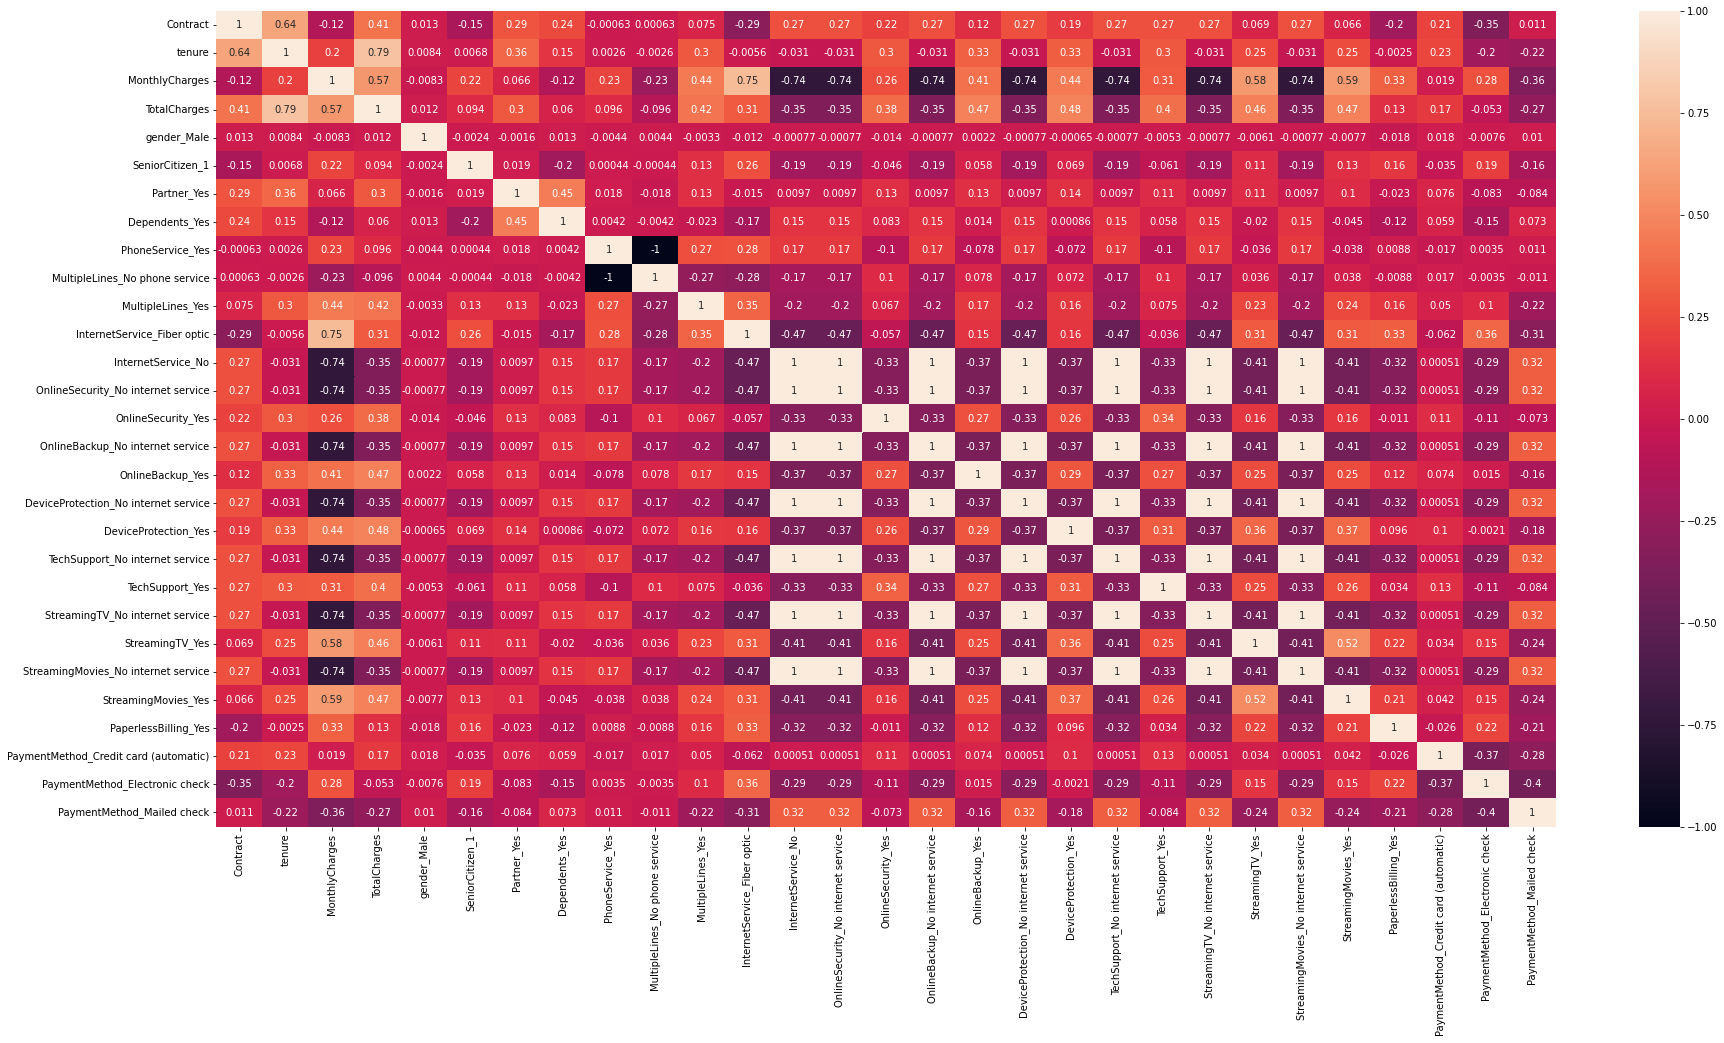

In [100]:
plt.rcParams['figure.figsize'] = [30,15]
sns.heatmap(X.corr(),annot=True)

## Multicollinearity

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))

                                  feature     VIF
19        TechSupport_No internet service     inf
17   DeviceProtection_No internet service     inf
15       OnlineBackup_No internet service     inf
13     OnlineSecurity_No internet service     inf
12                     InternetService_No     inf
21        StreamingTV_No internet service     inf
23    StreamingMovies_No internet service     inf
8                        PhoneService_Yes 27.5850
2                          MonthlyCharges 11.4106
3                            TotalCharges  5.7394
9          MultipleLines_No phone service  4.8192
1                                  tenure  4.5936
11            InternetService_Fiber optic  3.9653
0                                Contract  2.3197
27         PaymentMethod_Electronic check  2.0145
24                    StreamingMovies_Yes  1.9023
22                        StreamingTV_Yes  1.8767
28             PaymentMethod_Mailed check  1.8656
26  PaymentMethod_Credit card (automatic)  1.5715


In [102]:
high_vif_cols = ['TechSupport_No internet service',
'DeviceProtection_No internet service',
'OnlineBackup_No internet service',
'OnlineSecurity_No internet service',
'InternetService_No',
'StreamingTV_No internet service',
'StreamingMovies_No internet service',
'PhoneService_Yes',
'MonthlyCharges']

In [103]:
X.drop(columns=high_vif_cols,inplace=True)
X

,Contract,tenure,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,-1.2883,-0.9949,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
5575-GNVDE,2,0.1558,-0.0756,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
3668-QPYBK,1,-1.2445,-0.9562,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
7795-CFOCW,2,0.6372,-0.0997,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0
9237-HQITU,1,-1.2445,-0.9347,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661-ACXBS,1,0.5059,1.1659,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0
5656-JAMLX,3,1.3811,-0.3899,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3462-BJQQA,1,-1.0695,-0.7365,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0


## Train test split

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [105]:
X_train.shape,y_train.shape

((4560, 20), (4560,))

In [106]:
X_test.shape,y_test.shape

((1140, 20), (1140,))

## Training models

In [107]:
metric_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1_Score'])

In [108]:
metric_df

,Model,Accuracy,Precision,Recall,f1_Score


## 1) Naive Bayes

Accuracy :  0.7543859649122807
Precision :  0.5388235294117647
Recall :  0.731629392971246
f1 Score :  0.6205962059620597


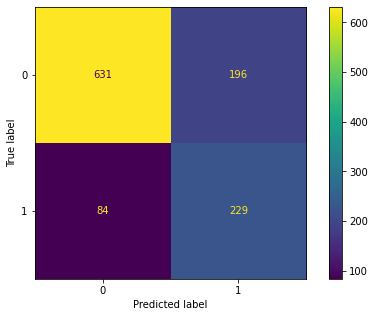

In [109]:
plt.rcParams['figure.figsize'] = [8,5]
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1 Score : ",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(nb,X_test,y_test)


In [110]:
metric_df.loc[len(metric_df)] = (['Naive Bayes',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206


## KNN

Accuracy :  0.756140350877193
Precision :  0.5609756097560976
Recall :  0.5143769968051118
f1 Score :  0.5366666666666667


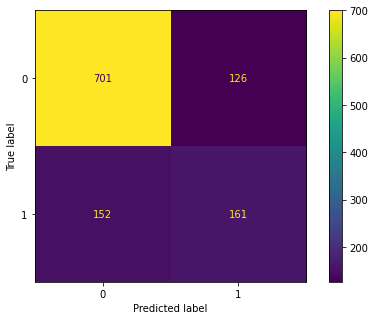

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1 Score : ",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(knn,X_test,y_test)

In [112]:
metric_df.loc[len(metric_df)] = (['KNN',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367


## Logistic Regression

Accuracy :  0.7719298245614035
Precision :  0.6007604562737643
Recall :  0.5047923322683706
f1 Score :  0.548611111111111


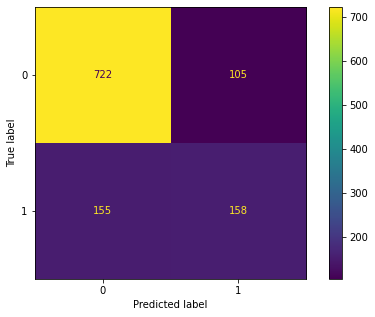

In [113]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1 Score : ",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(lg,X_test,y_test)

In [114]:
metric_df.loc[len(metric_df)] = (['Logistic Regression',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486


## SVM

Accuracy :  0.7824561403508772
Precision :  0.631578947368421
Recall :  0.4984025559105431
f1 Score :  0.557142857142857


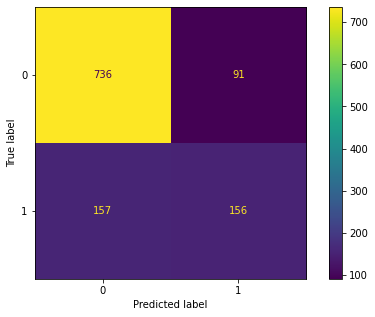

In [115]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1 Score : ",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(sv,X_test,y_test)

In [116]:
metric_df.loc[len(metric_df)] = (['SVM',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571


## Decision Tree

Accuracy :  0.7
Precision :  0.45592705167173253
Recall :  0.4792332268370607
f1 Score :  0.4672897196261682


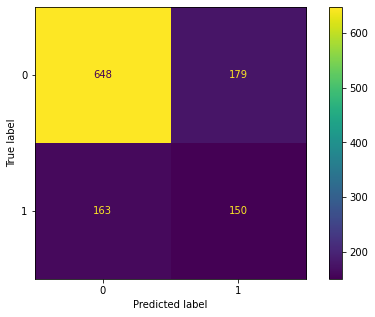

In [117]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))
print("Precision : ",metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print("f1 Score : ",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(dt,X_test,y_test)

In [118]:
metric_df.loc[len(metric_df)] = (['Decsion Tree',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571
4,Decsion Tree,0.7000,0.4559,0.4792,0.4673


## Hyperparameter Tuning

#### 1) Naive Bayes

In [119]:
from sklearn.model_selection import GridSearchCV

grid_params = {'var_smoothing':[1/(10**x) for x in range(0,16)]}

nb_gs = GridSearchCV(GaussianNB(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
nb_gs.fit(X_train, y_train)
nb_gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'var_smoothing': 0.01}

Accuracy :  0.756140350877193
Precision :  0.5409836065573771
Recall :  0.7380191693290735
f1_Score :  0.6243243243243244


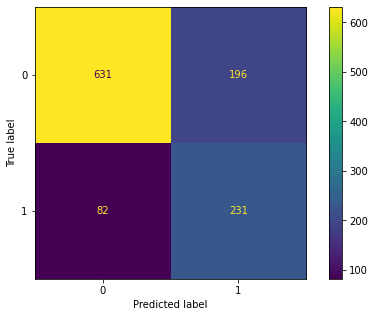

In [120]:
nb_gs = GaussianNB(var_smoothing = 0.01)
nb_gs.fit(X_train,y_train)
y_gs_pred = nb_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(nb_gs,X_test,y_test)

In [121]:
metric_df.loc[len(metric_df)] = (['Optimized Naive Bayes',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571
4,Decsion Tree,0.7000,0.4559,0.4792,0.4673
5,Optimized Naive Bayes,0.7561,0.5410,0.7380,0.6243


### KNN

In [122]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
knn_gs.fit(X_train, y_train)
knn_gs.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'uniform'}

Accuracy :  0.762280701754386
Precision :  0.5777777777777777
Recall :  0.4984025559105431
f1_Score :  0.5351629502572898


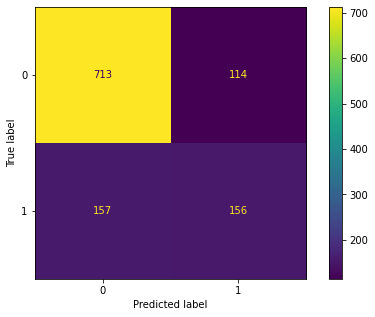

In [123]:
knn_gs = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 17, weights = 'uniform')
knn_gs.fit(X_train,y_train)
y_gs_pred = knn_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(knn_gs,X_test,y_test)

In [124]:
metric_df.loc[len(metric_df)] = (['Optimized KNN',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571
4,Decsion Tree,0.7000,0.4559,0.4792,0.4673
5,Optimized Naive Bayes,0.7561,0.5410,0.7380,0.6243
6,Optimized KNN,0.7623,0.5778,0.4984,0.5352


### Logistic Regression

In [125]:
from sklearn.model_selection import GridSearchCV

grid_params = {'penalty':['l1', 'l2', 'elasticnet','none'],
              'C':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']}

lg_gs = GridSearchCV(LogisticRegression(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
lg_gs.fit(X_train, y_train)
lg_gs.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


{'C': 0.75, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy :  0.7728070175438596
Precision :  0.6030534351145038
Recall :  0.5047923322683706
f1_Score :  0.5495652173913044


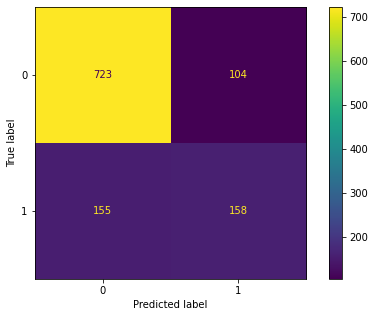

In [126]:
lg_gs = LogisticRegression(C= 0.75, penalty= 'l1', solver= 'liblinear')
lg_gs.fit(X_train,y_train)
y_gs_pred = lg_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(lg_gs,X_test,y_test)

In [127]:
metric_df.loc[len(metric_df)] = (['Optimized Logistic Regression',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571
4,Decsion Tree,0.7000,0.4559,0.4792,0.4673
5,Optimized Naive Bayes,0.7561,0.5410,0.7380,0.6243
6,Optimized KNN,0.7623,0.5778,0.4984,0.5352
7,Optimized Logistic Regression,0.7728,0.6031,0.5048,0.5496


## SVM

In [129]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

grid_params = { 'C':[1,2,5,10],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[1,2,3,4,5],
               'gamma': [1, 0.1, 0.01, 0.001]}

svm_rs = RandomizedSearchCV(SVC(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
svm_rs.fit(X_train, y_train)
svm_rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'kernel': 'linear', 'gamma': 0.1, 'degree': 4, 'C': 2}

Accuracy :  0.7789473684210526
Precision :  0.6142322097378277
Recall :  0.5239616613418531
f1_Score :  0.5655172413793104


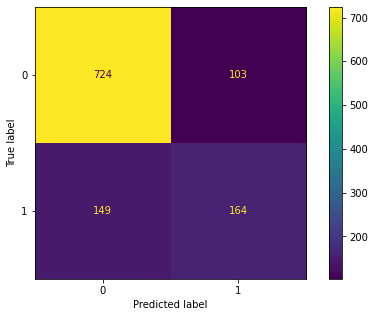

In [132]:
svm_rs = SVC(kernel= 'linear', gamma= 0.1, degree= 4, C= 2)
svm_rs.fit(X_train,y_train)
y_rs_pred = svm_rs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_rs_pred))
print("Precision : ",metrics.precision_score(y_test,y_rs_pred))
print("Recall : ",metrics.recall_score(y_test,y_rs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_rs_pred))
metrics.plot_confusion_matrix(svm_rs,X_test,y_test)

In [133]:
metric_df.loc[len(metric_df)] = (['Optimized SVM',metrics.accuracy_score(y_test,y_rs_pred),metrics.precision_score(y_test,y_rs_pred)
                 ,metrics.recall_score(y_test,y_rs_pred),metrics.f1_score(y_test,y_rs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571
4,Decsion Tree,0.7000,0.4559,0.4792,0.4673
5,Optimized Naive Bayes,0.7561,0.5410,0.7380,0.6243
6,Optimized KNN,0.7623,0.5778,0.4984,0.5352
7,Optimized Logistic Regression,0.7728,0.6031,0.5048,0.5496
8,Optimized SVM,0.7789,0.6142,0.5240,0.5655


### Decision Tree

In [135]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'criterion': ["gini", "entropy"],
                'max_depth': range(2,11),
                'min_samples_split': range(5,50,5),
                'min_samples_leaf': range(1,11)
                }

dt_gs = GridSearchCV(DecisionTreeClassifier(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
dt_gs.fit(X_train, y_train)
dt_gs.best_params_

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

Accuracy :  0.7508771929824561
Precision :  0.5403899721448467
Recall :  0.6198083067092651
f1_Score :  0.5773809523809523


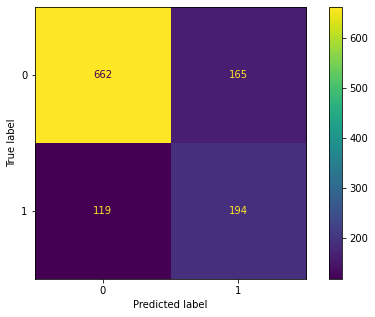

In [136]:
dt_gs = DecisionTreeClassifier(ccp_alpha= 0.0,
            criterion =  'gini',
            max_depth = 2,
            min_samples_leaf = 1,
            min_samples_split = 5)
dt_gs.fit(X_train,y_train)
y_gs_pred = dt_gs.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(dt_gs,X_test,y_test)

In [137]:
metric_df.loc[len(metric_df)] = (['Optimized Decision Tree',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Naive Bayes,0.7544,0.5388,0.7316,0.6206
1,KNN,0.7561,0.5610,0.5144,0.5367
2,Logistic Regression,0.7719,0.6008,0.5048,0.5486
3,SVM,0.7825,0.6316,0.4984,0.5571
4,Decsion Tree,0.7000,0.4559,0.4792,0.4673
5,Optimized Naive Bayes,0.7561,0.5410,0.7380,0.6243
6,Optimized KNN,0.7623,0.5778,0.4984,0.5352
7,Optimized Logistic Regression,0.7728,0.6031,0.5048,0.5496
8,Optimized SVM,0.7789,0.6142,0.5240,0.5655
9,Optimized Decision Tree,0.7509,0.5404,0.6198,0.5774


In [138]:
dump(nb_gs,"/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_best_model.joblib")

['/content/drive/MyDrive/Colab Notebooks/Mini Project 1/mp1_best_model.joblib']